In [ ]:
!pip install contractions
!pip install wordcloud

In [1]:
# prompt: mount gdrive'

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv(r'/content/drive/MyDrive/reviews.csv')
sentiment_mapping = {'positive': 1, 'negative': 0}
data['sentiment'] = data['sentiment'].map(sentiment_mapping)

data['sentiment'].value_counts()



1    25000
0    25000
Name: sentiment, dtype: int64

In [3]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [7]:
!pip install ntlk
!pip install contractions


ERROR: Could not find a version that satisfies the requirement ntlk (from versions: none)
ERROR: No matching distribution found for ntlk
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 8.4 MB/s eta 0:00:00


In [8]:

import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
import re
import contractions



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
data['review'] =data['review'].apply(lambda text: contractions.fix(text))
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there is a family where a little boy...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I am going to have to disagree with the previo...,0


In [10]:
import string
stop_words = set(stopwords.words('english'))
def remove_html_tags(text):
    clean_text = re.sub('<[^<]+?>', '', text)
    return clean_text
def remove_extra_spaces(text):
    cleaned_text = " ".join(text.split())
    return cleaned_text
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word.lower() not in stop_words])

def preprocess_data(text):
    text = remove_stopwords(text)
    text = remove_html_tags(text)
    text =text.lower()
    text= ''.join(char for char in text if char not in string.punctuation)
#     text = re.sub('[%s]' % re.escape(string.punctuation), ' ' , text)
    text = remove_extra_spaces(text)


    return text



data['review'] = data['review'].apply(lambda text: preprocess_data(text))
# data['review'] = data['review'].apply(lambda text: word_tokenize(text))
data




,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,1
1,wonderful little production the filming techni...,1
2,thought wonderful way spend time hot summer we...,1
3,basically family little boy jake thinks zombie...,0
4,petter matteis love time money visually stunni...,1
...,...,...
49995,thought movie right good job creative original...,1
49996,bad plot bad dialogue bad acting idiotic direc...,0
49997,catholic taught parochial elementary schools n...,0
49998,going disagree previous comment side maltin on...,0


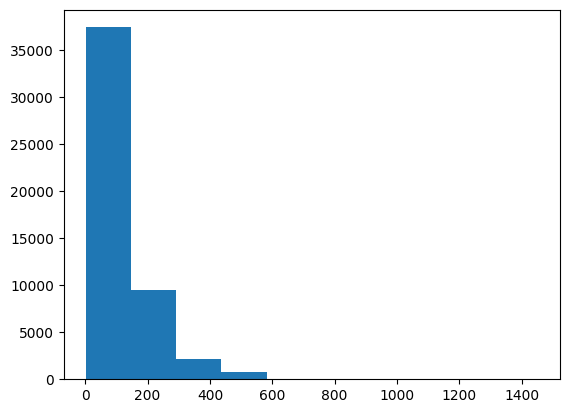

Average length of each review is : 121.66
Standard deviation of length of each review is : 91.58
Length of the sequence to be mean + 3*std which becomes :  396


In [11]:
lengths = []
for text , label in list(zip(data['review'],data['sentiment'])):
    lengths.append(len(text.split(" ")))
plt.hist(lengths)
plt.show()
mean = np.mean(lengths)
std = np.std(lengths)
sequence_length = int(mean + 3*std)

print("Average length of each review is : %0.2f"%mean)
print("Standard deviation of length of each review is : %0.2f"%std)
print("Length of the sequence to be mean + 3*std which becomes : ",sequence_length)

In [12]:
all_reviews = data['review'].to_list()
all_sentiment = data['sentiment'].to_list()
all_reviews

['one reviewers mentioned watching 1 oz episode hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust me show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows would dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz mess around first episode ever saw struck nasty surreal could say ready it watched more developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away it well mannered middle class inmates tur

In [13]:
all_text = " ".join(all_reviews)
all_words = all_text.split()

In [14]:
from collections import Counter

count_words = Counter(all_words)
total_words=len(all_words)
sorted_words=count_words.most_common(total_words)
print(f"Top ten occuring words : {sorted_words[:10]}")


Top ten occuring words : [('movie', 83507), ('film', 74462), ('one', 50366), ('like', 38825), ('would', 31029), ('good', 28483), ('even', 24280), ('time', 23265), ('really', 22894), ('see', 22435)]


In [15]:
vocab_to_int={w:i+1 for i,(w,c) in enumerate(sorted_words)}
print(vocab_to_int['movie'])

1


In [16]:
encoded_reviews=list()
for review in all_reviews:
  encoded_review=list()
  for word in review.split():
    if word not in vocab_to_int.keys():
      #if word is not available in vocab_to_int put 0 in that place
      encoded_review.append(0)
    else:
      encoded_review.append(vocab_to_int[word])
  encoded_reviews.append(encoded_review)

In [17]:

features=np.zeros((len(encoded_reviews), sequence_length), dtype=int)
for i, review in enumerate(encoded_reviews):
  review_len=len(review)
  if (review_len<=sequence_length):
    zeros=list(np.zeros(sequence_length-review_len))
    new=zeros+review
  else:
    new=review[:sequence_length]
  features[i,:]=np.array(new)

In [18]:
labels = all_sentiment
train_x=features[:int(0.8*len(features))]
train_y=labels[:int(0.8*len(features))]
valid_x=features[int(0.8*len(features)):int(0.9*len(features))]
valid_y=labels[int(0.8*len(features)):int(0.9*len(features))]
test_x=features[int(0.9*len(features)):]
test_y=labels[int(0.9*len(features)):]
print(len(train_y), len(valid_y), len(test_y))

40000 5000 5000


In [19]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Convert lists to tensors
train_data = TensorDataset(torch.tensor(train_x), torch.tensor(train_y))
valid_data = TensorDataset(torch.tensor(valid_x), torch.tensor(valid_y))
test_data = TensorDataset(torch.tensor(test_x), torch.tensor(test_y))

# DataLoader
batch_size = 50
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)


In [20]:
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score

class BidirecLSTM(nn.Module):
    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        super(BidirecLSTM, self).__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True, bidirectional=True)

        self.dropout = nn.Dropout(0.3)

        self.fc1 = nn.Linear(hidden_dim * 2, 64)  # Multiply by 2 because of bidirectional LSTM
        self.fc2 = nn.Linear(64, 16)
        self.fc3 = nn.Linear(16, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x, hidden):
        batch_size = x.size(0)
        embeds = self.embedding(x)  # shape: B x S x Feature
        lstm_out, hidden = self.lstm(embeds, hidden)

        # Concatenate the forward and backward hidden states
        lstm_out = torch.cat((hidden[0][-2,:,:], hidden[0][-1,:,:]), dim=1)

        out = self.dropout(lstm_out)
        out = self.fc1(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.dropout(out)
        out = self.fc3(out)
        sig_out = self.sigmoid(out)

        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1]

        return sig_out, hidden

    def init_hidden(self, batch_size):
        h0 = torch.zeros((self.n_layers * 2, batch_size, self.hidden_dim))  # Multiply by 2 because of bidirectional LSTM
        c0 = torch.zeros((self.n_layers * 2, batch_size, self.hidden_dim))  # Multiply by 2 because of bidirectional LSTM
        hidden = (h0, c0)
        return hidden
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding
output_size = 1
embedding_dim = 400
hidden_dim = 256
n_layers = 2

net = BidirecLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(net)


BidirecLSTM(
  (embedding): Embedding(221322, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5, bidirectional=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_features=512, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [ ]:


# function to predict accuracy
def acc(pred,label):
    pred = torch.round(pred.squeeze())
    return torch.sum(pred == label.squeeze()).item()


In [24]:
# Move model to GPU, if available
lr=0.001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

# training params

epochs = 3 # 3-4 is approx where I noticed the validation loss stop decreasing

counter = 0
print_every = 100
clip=5 # gradient clipping
# Move model to GPU, if available
if train_on_gpu:
    net.cuda()

net.train()

# Train for some number of epochs
for e in range(epochs):
    # Initialize hidden states
    h = net.init_hidden(batch_size)

    # Move hidden states to the same device as inputs
    if train_on_gpu:
        h = tuple([each.cuda() for each in h])

    # Batch loop
    for inputs, labels in train_loader:
        counter += 1

        if train_on_gpu:
            inputs = inputs.cuda()
            labels = labels.cuda()

        # Creating new variables for the hidden state
        h = tuple([each.data for each in h])

        # Zero accumulated gradients
        net.zero_grad()

        # Get the output from the model
        output, h = net(inputs, h)

        # Calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # Clip gradients to prevent exploding gradient problem
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # Loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:
                if train_on_gpu:
                    inputs, labels = inputs.cuda(), labels.cuda()

                # Move hidden states to the same device as inputs
                val_h = tuple([each.cuda() for each in val_h])

                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))


Epoch: 1/3... Step: 100... Loss: 0.540660... Val Loss: 0.594316
Epoch: 1/3... Step: 200... Loss: 0.607852... Val Loss: 0.520156
Epoch: 1/3... Step: 300... Loss: 0.498800... Val Loss: 0.483908
Epoch: 1/3... Step: 400... Loss: 0.485133... Val Loss: 0.454730
Epoch: 1/3... Step: 500... Loss: 0.480325... Val Loss: 0.377689
Epoch: 1/3... Step: 600... Loss: 0.307771... Val Loss: 0.389316
Epoch: 1/3... Step: 700... Loss: 0.346611... Val Loss: 0.323672
Epoch: 1/3... Step: 800... Loss: 0.418310... Val Loss: 0.311558
Epoch: 2/3... Step: 900... Loss: 0.220459... Val Loss: 0.329010
Epoch: 2/3... Step: 1000... Loss: 0.137309... Val Loss: 0.320660
Epoch: 2/3... Step: 1100... Loss: 0.357027... Val Loss: 0.314346
Epoch: 2/3... Step: 1200... Loss: 0.091831... Val Loss: 0.298919
Epoch: 2/3... Step: 1300... Loss: 0.192706... Val Loss: 0.316015
Epoch: 2/3... Step: 1400... Loss: 0.233876... Val Loss: 0.291507
Epoch: 2/3... Step: 1500... Loss: 0.306323... Val Loss: 0.277324
Epoch: 2/3... Step: 1600... Loss: 

In [26]:
test_losses = [] # track loss
num_correct = 0

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in test_loader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    if train_on_gpu:
        h = tuple([each.cuda() for each in h])
    h = tuple([each.data for each in h])

    if(train_on_gpu):
        inputs, labels = inputs.cuda(), labels.cuda()


    output, h = net(inputs, h)

    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())

    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer

    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)


# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

Test loss: 0.318
Test accuracy: 0.883
